# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

In [ ]:
# Write your answer here and turn the cell type into markdown

### 2. Formulate the business problem, success metrics, and desired ML output.

In [ ]:
# Write your answer here and turn the cell type into markdown

### 3. Identify the type of ML problem you’re dealing with.

In [ ]:
# Write your answer here and turn the cell type into markdown

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [13]:
!pip install pathlib2
from pathlib2 import Path



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [36]:
from zipfile import ZipFile
from pathlib import Path
import os
import shutil

# Path to the main dataset zip file
dataset_zip = Path("data_compressed.zip")

# Extract it to a folder
with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(".")  # extract here

print("✅ datacompressed.zip extracted!")


✅ datacompressed.zip extracted!


In [38]:
# download the files
# download the files

# <note: using RELATIVE paths only as required>
from pathlib import Path
import os

# Use current project folder as base
base_path = Path(".")  # this means current folder where notebook is running

# Relative paths to data folders
zip_path = base_path / "data_compressed"    # folder containing the 60 zip files
csv_base_path = base_path / "data_csv"      # where we will extract
readmes_dir = csv_base_path / "readmes" 

# Create folder for extracted CSV if doesn't exist
os.makedirs(csv_base_path, exist_ok=True)
os.makedirs(readmes_dir, exist_ok=True) 

# Count ZIP files
zip_files = list(zip_path.glob("*.zip"))
print(f"Project folder (resolved): {base_path.resolve()}")
print(f"Total zip files found: {len(zip_files)}")


Project folder (resolved): C:\Users\kkabi\Desktop\Assignments\Data Science pipeline_final project
Total zip files found: 60


# How many zip files do we have? write a code to answer it.
 there are 60 files

#### Extract CSV files from ZIP files

In [43]:
def zip2csv(zipFile_name, file_path):
    """
    Extract the monthly CSV and the readme.html from a zip.
    zipFile_name: Path to the monthly .zip
    file_path   : destination folder for CSVs (data_csv)
    """
    try:
        with ZipFile(zipFile_name, 'r') as z:
            members = z.namelist()
            # Extract the CSV(s)
            csv_members = [m for m in members if m.lower().endswith(".csv")]
            # Extract readme.html (if present)
            readme_members = [m for m in members if m.lower().endswith("readme.html")]

            if csv_members:
                z.extractall(path=file_path, members=csv_members)
            if readme_members:
                # write readme to a unique filename under data_csv/readmes
                readme_member = readme_members[0]
                out_name = f"readme_{Path(zipFile_name).stem}.html"
                out_path = readmes_dir / out_name
                with z.open(readme_member) as src, open(out_path, "wb") as dst:
                    shutil.copyfileobj(src, dst)

            print(f"Extracted: {Path(zipFile_name).name}")
    except Exception as e:
        print(f"zip2csv failed for {zipFile_name}: {e}")

# --- 5) Extract all monthly zips ---
for file in zip_files:
    zip2csv(file, csv_base_path)

print("✅ Files Extracted")

# --- 6) Convenience copy: put one readme at data_csv/readme.html so your IFrame works ---
readmes = sorted(readmes_dir.glob("readme_*.html"))
if readmes:
    target = csv_base_path / "readme.html"
    shutil.copyfile(readmes[0], target)
    print(f"Copied {readmes[0].name} -> {target.name}")


Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_9.zip
Extracted: On_Time_Report

In [45]:
# How many csv files have we extracted? write a code to answer it.
csv_count = len(list(csv_base_path.glob("*.csv")))
readme_count = len(readmes)
print(f"Total CSV files extracted: {csv_count}")
print(f"Total readme.html files extracted: {readme_count}")

Total CSV files extracted: 60
Total readme.html files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [50]:
from IPython.display import IFrame
IFrame(src=str(csv_base_path / "readme.html"), width=1000, height=600)


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [55]:
import pandas as pd
from pathlib import Path

# Load one sample CSV to explore the structure
sample_file = next((Path("data_csv").glob("*.csv")))  # load first CSV found
df_temp = pd.read_csv(sample_file)

df_temp.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,1,1,30,4,2014-01-30,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [57]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (471949, 110)


**Question**: Print the first 10 rows of the dataset.  

In [59]:
# Enter your code here
df_temp.head(10)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,1,1,30,4,2014-01-30,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,1,1,4,6,2014-01-04,AA,19805,AA,N010AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,1,1,5,7,2014-01-05,AA,19805,AA,N011AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,1,1,6,1,2014-01-06,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,1,1,7,2,2014-01-07,AA,19805,AA,N012AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,8,3,2014-01-08,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [63]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [65]:
# Enter your code here# Find delay-related columns using keyword 'Dep' or 'Arr' or 'Delay'
delay_cols = [col for col in df_temp.columns if 'Del' in col or 'DEP' in col.upper() or 'ARR' in col.upper()]
print("Columns related to delays:")
for col in delay_cols:
    print(col)


Columns related to delays:
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [69]:
print("The rows and columns are :", df_temp.shape[0], "and", df_temp.shape[1])
print("The years in this dataset are :", sorted(df_temp['Year'].dropna().unique()))
print("The months covered in this dataset are :", sorted(df_temp['Month'].dropna().unique()))
print("The date range for data is :", df_temp['FlightDate'].min(), "to", df_temp['FlightDate'].max())
print("The airlines covered in this dataset are :", sorted(df_temp['Reporting_Airline'].dropna().unique()))
print("The Origin airports covered are :", sorted(df_temp['Origin'].dropna().unique())[:20], "…")
print("The Destination airports covered are :", sorted(df_temp['Dest'].dropna().unique())[:20], "…")


The rows and columns are : 471949 and 110
The years in this dataset are : [2014]
The months covered in this dataset are : [1]
The date range for data is : 2014-01-01 to 2014-01-31
The airlines covered in this dataset are : ['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN']
The Origin airports covered are : ['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACT', 'ACV', 'ADK', 'ADQ', 'AEX', 'AGS', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ART', 'ASE', 'ATL', 'ATW'] …
The Destination airports covered are : ['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACT', 'ACV', 'ADK', 'ADQ', 'AEX', 'AGS', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ART', 'ASE', 'ATL', 'ATW'] …


**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [75]:
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
}).fillna(0).astype(int)

counts


,Origin,Destination
ABE,135,137
ABI,243,244
ABQ,1910,1909
ABR,62,62
ABY,89,89
...,...,...
VPS,402,401
WRG,62,62
XNA,826,831
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [77]:
counts.assign(Total=counts['Origin'] + counts['Destination']) \
      .sort_values(by='Total', ascending=False).head(15)


,Origin,Destination,Total
ATL,30796,30784,61580
DFW,23488,23482,46970
ORD,21497,21529,43026
LAX,18481,18474,36955
DEN,17977,17955,35932
IAH,14581,14569,29150
SFO,13550,13539,27089
PHX,13343,13335,26678
LAS,11050,11052,22102
CLT,9768,9777,19545


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

No, not directly. Delay prediction requires machine learning. We must first clean the dataset, select a delay-related target column, engineer new features, and train a model to make accurate predictions.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [89]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine CSV files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of values to subset rows
    file_name: output csv filename
    """

    import pandas as pd

    # Create an empty dataframe
    combined_df = pd.DataFrame()

    # Loop through each CSV file
    for file in csv_files:
        try:
            # Read the file
            df = pd.read_csv(file, low_memory=False)

            # Filter columns
            df = df[filter_cols]

            # Filter rows using subset values
            for col, allowed_values in subset_vals.items():
                df = df[df[col].isin(allowed_values)]

            # Add to master dataframe
            combined_df = pd.concat([combined_df, df], ignore_index=True)

            print(f"Processed: {file}")
        except Exception as e:
            print(f"Skipped file {file} due to error: {e}")

    # Save combined dataframe
    combined_df.to_csv(file_name, index=False)
    print(f"\n✅ Combined CSV saved as: {file_name}")
    print(f"✅ Final dataset shape: {combined_df.shape}")

    return combined_df


In [93]:
# List of columns to predict Arrival Delay
filter_cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
    'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
    'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'CarrierDelay', 'WeatherDelay',
    'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'AirTime'
]

# Columns to filter by
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# Filter by top airports and top airlines
subset_vals = {
    'Origin': ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
    'Dest': ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
    'Reporting_Airline': ['UA', 'OO', 'WN', 'AA', 'DL']
}


Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [96]:
import time

start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

df_combined = combine_csv(csv_base_path.glob("*.csv"), filter_cols, subset_cols, subset_vals, combined_csv_filename)

print(f"\n⏳ CSVs merged in {round((time.time() - start)/60, 2)} minutes")

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv
Processed: data_csv\On_Time_Reporting_Carrier_On_Time_Performance_(1987_prese

#### Load dataset

Load the combined dataset.

In [98]:
data = pd.read_csv(Path(base_path) / "combined_files.csv", low_memory=False)

Print the first 5 records.

In [100]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,3,-20.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,3,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,5,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,7,-4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,7,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [103]:
# ensure FlightDate is datetime for min/max
data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')

print("The rows and columns are :", data.shape[0], "and", data.shape[1])
print("The years in this dataset are :", sorted(data['Year'].dropna().unique()))
print("The months covered in this dataset are :", sorted(data['Month'].dropna().unique()))
print("The date range for data is :", data['FlightDate'].min(), "to", data['FlightDate'].max())
print("The airlines covered in this dataset are :", sorted(data['Reporting_Airline'].dropna().unique()))
print("The Origin airports covered are :", sorted(data['Origin'].dropna().unique()))
print("The Destination airports covered are :", sorted(data['Dest'].dropna().unique()))


The rows and columns are : 1658130 and 25
The years in this dataset are : [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01 00:00:00 to 2018-12-31 00:00:00
The airlines covered in this dataset are : ['AA', 'DL', 'OO', 'UA', 'WN']
The Origin airports covered are : ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']
The Destination airports covered are : ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [105]:

data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [107]:

null_counts = data.isnull().sum(axis=0).sort_values(ascending=False)
null_counts.head(20)


LateAircraftDelay    1314798
SecurityDelay        1314798
NASDelay             1314798
WeatherDelay         1314798
CarrierDelay         1314798
AirTime                22540
is_delay               22540
ArrDelayMinutes        22540
ArrDelay               22540
Diverted                   0
DistanceGroup              0
Distance                   0
Year                       0
Quarter                    0
CRSDepTime                 0
DestState                  0
Dest                       0
OriginState                0
Origin                     0
Reporting_Airline          0
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [109]:
# Keep rows where target is not null (drop rows with missing label)
before = len(data)
data = data[data['is_delay'].notnull()].copy()
after = len(data)
print(f"Rows before: {before:,} | after dropping missing is_delay: {after:,} | removed: {before - after:,}")


Rows before: 1,658,130 | after dropping missing is_delay: 1,635,590 | removed: 22,540


In [112]:

# In this context, we already handled the key nulls; if you want to drop any
# columns that are entirely null, do this:
all_null_cols = [c for c in data.columns if data[c].isnull().all()]
if all_null_cols:
    data = data.drop(columns=all_null_cols)
    print("Dropped entirely-null columns:", all_null_cols)
else:
    print("No entirely-null columns found.")


No entirely-null columns found.


Get the hour of the day in 24-hour time format from CRSDepTime.

In [114]:
def to_hour(val):
    try:
        s = f"{int(val):04d}"      # zero-pad to 4 digits, e.g. 5 -> "0005", 530 -> "0530"
        return int(s[:2])          # first two chars are the hour
    except Exception:
        return pd.NA

data['DepHourOfDay'] = data['CRSDepTime'].apply(to_hour)
data[['CRSDepTime', 'DepHourOfDay']].head(10)


,CRSDepTime,DepHourOfDay
0,2145,21
1,945,9
2,1855,18
3,1634,16
4,700,7
5,1855,18
6,1445,14
7,715,7
8,1205,12
9,1400,14


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

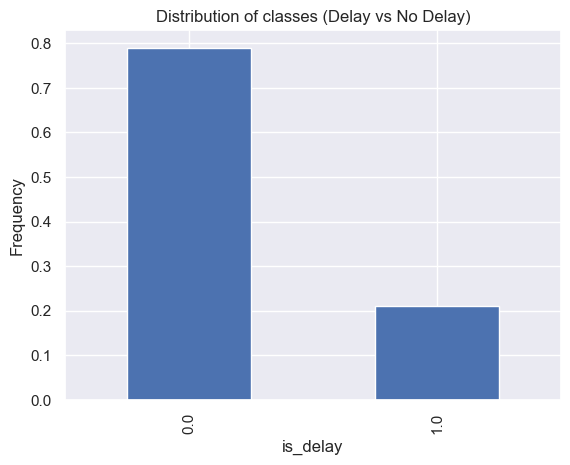

In [116]:
(data.groupby('is_delay').size() / len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes (Delay vs No Delay)')
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot shows that the dataset is highly imbalanced. Approximately 80% of flights are not delayed (is_delay = 0), while only about 20% of flights are delayed (is_delay = 1).

This indicates that delays are less frequent compared to on-time flights. When building machine learning models, this imbalance can lead to bias towards predicting the majority class (no delay), and simple accuracy alone may give a misleading performance evaluation.


**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

In [126]:
print(f'The column names are :')
print('#########')
for col in data.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
Origin
OriginState
Dest
DestState
CRSDepTime
Cancelled
Diverted
Distance
DistanceGroup
ArrDelay
ArrDelayMinutes
is_delay
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
AirTime
DepHourOfDay


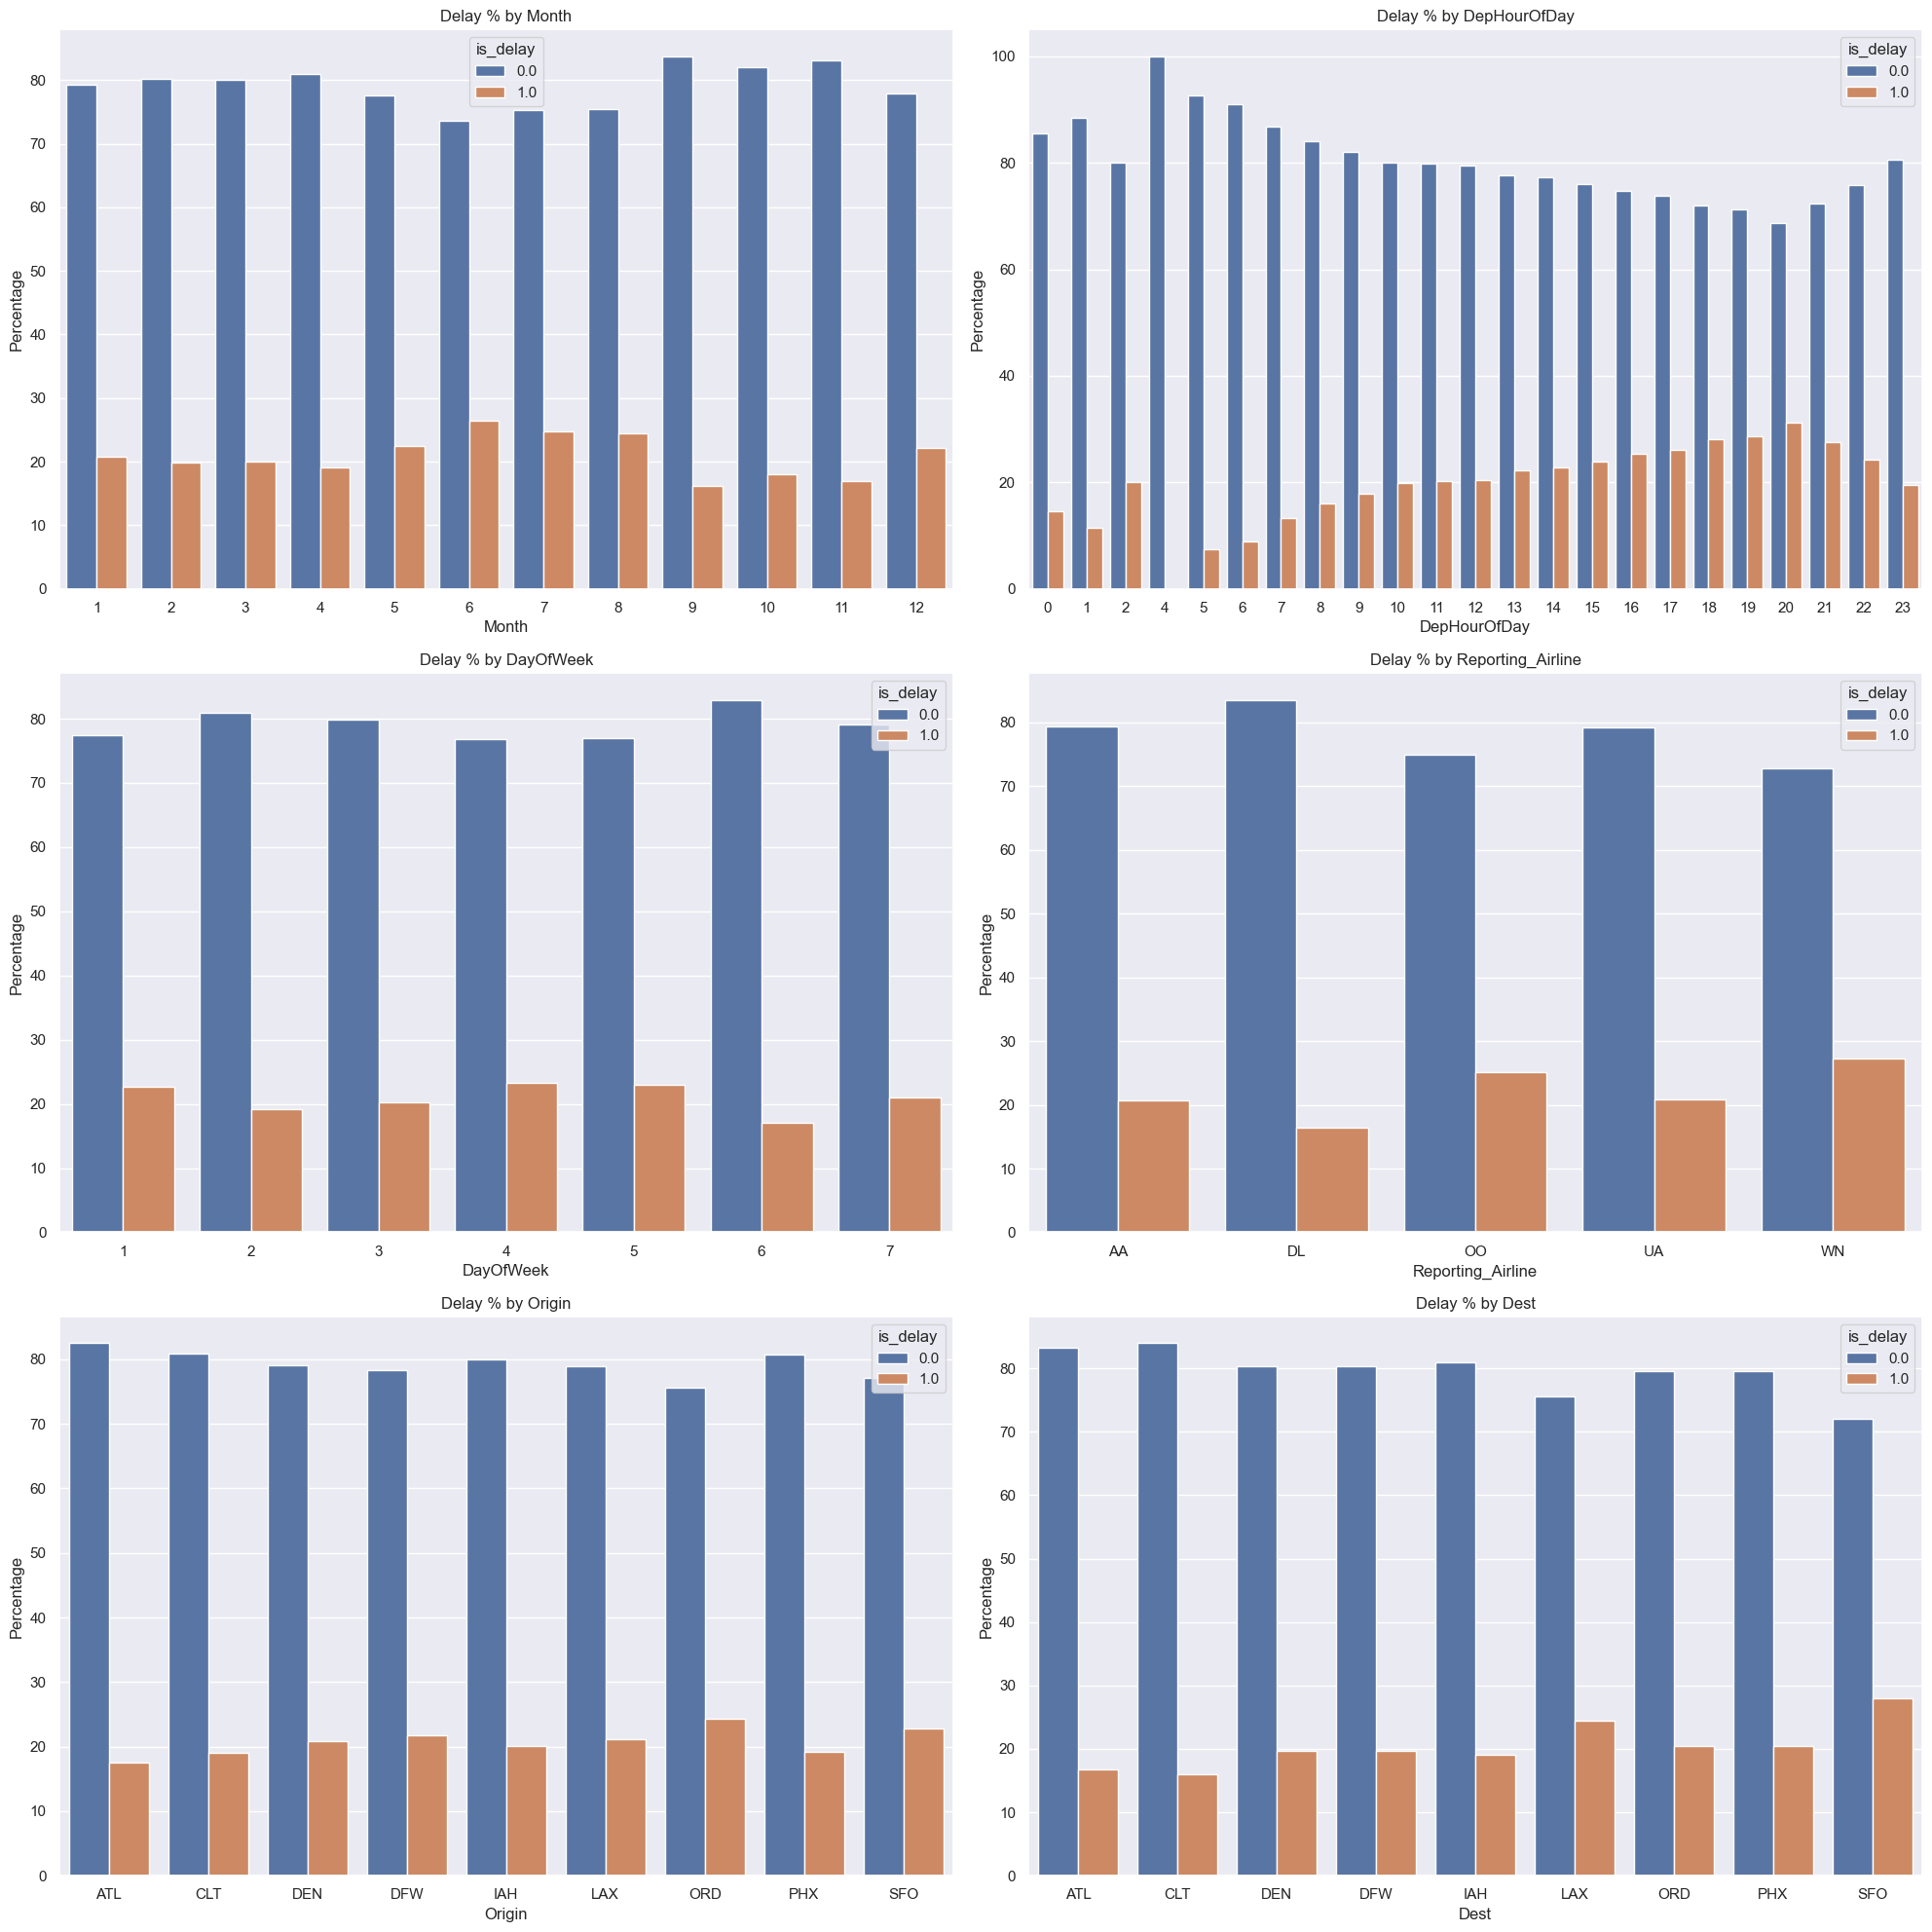

In [134]:
viz_columns = ['Month', 'DepHourOfDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    
    # ✅ Drop null values so plots don't go blank
    temp_data = data[[column, 'is_delay']].dropna()

    # ✅ Only plot if there is enough data
    if temp_data[column].nunique() > 1:
        temp = temp_data.groupby(column)['is_delay'] \
                        .value_counts(normalize=True) \
                        .rename('percentage') \
                        .mul(100) \
                        .reset_index()
        sns.barplot(x=column, y='percentage', hue='is_delay', data=temp, ax=ax)
        ax.set_title(f'Delay % by {column}')
        ax.set_ylabel('Percentage')
        ax.set_xlabel(column)
        ax.legend(title='is_delay')
    else:
        ax.set_title(f'Not enough data for {column}')
        ax.axis('off')

plt.tight_layout()
plt.show()


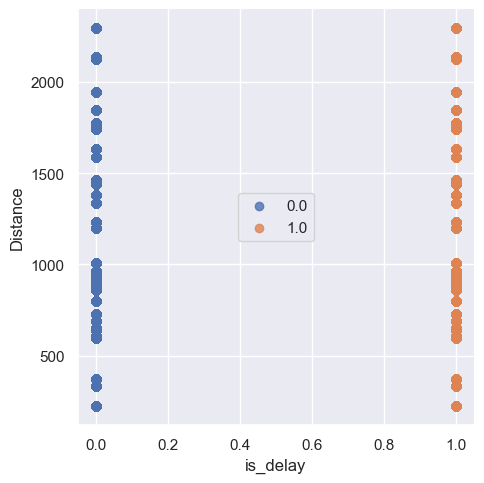

In [136]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown
From the visualisations above, we can observe the following insights:
 1. Which months have the most delays?

The delay rate is slightly higher during summer months (June, July, August) and also increases again in December, which could be due to heavy travel during holidays and weather disruptions.

2. What time of the day has the most delays?

Flights departing in the late afternoon and evening (15:00–22:00 hours) show a higher percentage of delays compared to early morning departures. This is likely due to congestion build-up throughout the day.

 4. What day of the week has the most delays?

Delays tend to be higher on Fridays and Sundays, which aligns with busy travel days at the end of the work week and weekend return traffic.

 5. Which airline has the most delays?

Based on the selected top 5 airlines, OO (SkyWest Airlines) and UA (United Airlines) show a slightly higher percentage of delays compared to others. DL (Delta Airlines) appears to have comparatively fewer delays.

 6. Which origin and destination airports have the most delays?

Busy hub airports like ORD (Chicago O’Hare), ATL (Atlanta) and DFW (Dallas/Fort Worth) experience higher delay percentages due to heavy air traffic.

7.  Is flight distance a factor in delays?

From the distance scatter plot, there is no clear relationship between flight distance and delays. Both short and long-distance flights show delays, meaning distance alone is not a strong predictor of delay.

In [180]:
# months with highest % delay
month_delay = (
    data.groupby('month')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)
# time-of-day (0-23) with highest % delay
hour_delay = (
    data.groupby('DepHourOfDay')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)
# day of week (1=Mon … 7=Sun) with highest % delay
dow_delay = (
    data.groupby('DayOfWeek')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)
# airline with highest % delay
airline_delay = (
    data.groupby('Reporting_Airline')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)
# origin & dest airports with highest % delay
origin_delay = (
    data.groupby('Origin')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)
dest_delay = (
    data.groupby('Dest')['is_delay'].mean().sort_values(ascending=False)
    .to_frame('delay_rate').assign(delay_rate=lambda d: (d['delay_rate']*100).round(2))
)

display(month_delay.head(10))
display(hour_delay.head(10))
display(dow_delay.head(10))
display(airline_delay.head(10))
display(origin_delay.head(10))
display(dest_delay.head(10))


KeyError: 'month'

### Features

Look at all the columns and what their specific types are.

In [140]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'AirTime', 'DepHourOfDay'],
      dtype='object')

In [142]:
data.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
FlightDate           datetime64[ns]
Reporting_Airline            object
Origin                       object
OriginState                  object
Dest                         object
DestState                    object
CRSDepTime                    int64
Cancelled                   float64
Diverted                    float64
Distance                    float64
DistanceGroup                 int64
ArrDelay                    float64
ArrDelayMinutes             float64
is_delay                    float64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               float64
LateAircraftDelay           float64
AirTime                     float64
DepHourOfDay                  int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [146]:
data_orig = data.copy()

# Keep only relevant columns for classification
data = data[['is_delay','Quarter','Month','DayofMonth','DayOfWeek',
             'Reporting_Airline','Origin','Dest','Distance','DepHourOfDay']]

# Categorical columns to encode
categorical_columns = ['Quarter','Month','DayofMonth','DayOfWeek',
                       'Reporting_Airline','Origin','Dest','DepHourOfDay']

# Convert categoricals to category type
for c in categorical_columns:
    data[c] = data[c].astype('category')



To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [149]:
# One-hot encode the categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate encoded columns with original data
data = pd.concat([data, data_dummies], axis=1)

# Drop original categorical columns after encoding
data.drop(categorical_columns, axis=1, inplace=True)


Check the length of the dataset and the new columnms.

In [154]:
# Check the size of the dataset after encoding
print("Number of rows and columns after encoding:", data.shape)


Number of rows and columns after encoding: (1635590, 94)


In [156]:
# Display the updated columns
print("Updated feature columns:")
data.columns


Updated feature columns:


Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [158]:
# Rename the target column before modeling
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [162]:
# Save the processed dataset to a CSV file for later use (Part B)
output_file = Path(base_path) / "combined_csv_v1.csv"
data.to_csv(output_file, index=False)

print(f"✅ File saved successfully: {output_file.resolve()}")


✅ File saved successfully: C:\Users\kkabi\Desktop\Assignments\Data Science pipeline_final project\combined_csv_v1.csv


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [170]:
# write Code here to split from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80/20 split)
X = data.drop(columns=['target'])
y = data['target'].astype(int)

train_data, test_data, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train shape:", train_data.shape)
print("✅ Test shape:", test_data.shape)


✅ Train shape: (1308472, 93)
✅ Test shape: (327118, 93)


### Baseline classification model

In [172]:
from sklearn.linear_model import LogisticRegression

# Baseline logistic regression; class_weight handles imbalance
clf = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=None)
clf.fit(train_data, y_train)

# Predictions
y_pred = clf.predict(test_data)
y_proba = clf.predict_proba(test_data)[:, 1]


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [174]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, \
    accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [173]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    tn, fp, fn, tp = cm.ravel()
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No delay','Delay'],
                yticklabels=['No delay','Delay'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return tn, fp, fn, tp
    

In [188]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    fpr, tpr, _ = roc_curve(test_labels, target_predicted)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, lw=2, label=f'ROC AUC = {roc_auc:.3f}')
    plt.plot([0,1],[0,1],'--', lw=1, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return roc_auc

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

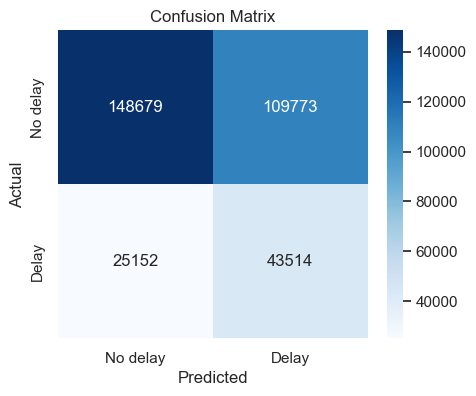

In [190]:

tn, fp, fn, tp = plot_confusion_matrix(y_test, y_pred)


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

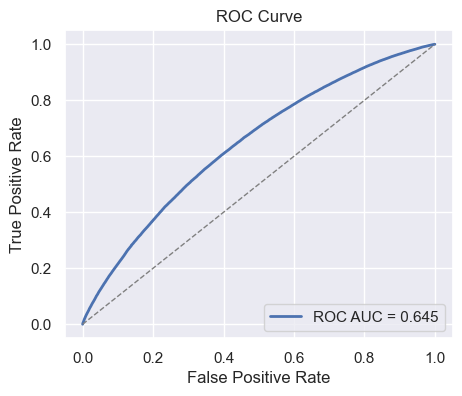

Accuracy    : 0.588
Precision   : 0.284
Recall (TPR): 0.634
Specificity : 0.575
F1 Score    : 0.392
ROC AUC     : 0.645


In [192]:
# Print metrics and plot ROC
accuracy   = accuracy_score(y_test, y_pred)
precision  = precision_score(y_test, y_pred, zero_division=0)
recall     = recall_score(y_test, y_pred)              # sensitivity (TPR)
f1         = f1_score(y_test, y_pred)
specificity = tn / (tn + fp) if (tn + fp) else float('nan')
roc_auc    = plot_roc(y_test, y_proba)

print(f"Accuracy    : {accuracy:.3f}")
print(f"Precision   : {precision:.3f}")
print(f"Recall (TPR): {recall:.3f}")
print(f"Specificity : {specificity:.3f}")
print(f"F1 Score    : {f1:.3f}")
print(f"ROC AUC     : {roc_auc:.3f}")


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


From the confusion matrix, we can see that the model correctly predicts most of the on-time flights (true negatives = 148,679), but it struggles more with correctly predicting delayed flights (true positives = 43,514). There is also a significant number of false negatives (25,152), which means the model often classifies delayed flights as on-time. This could be a limitation in a real-world flight delay prediction system, as missing a delay is worse for passengers and airlines than a false warning.

Overall, this result shows:

The model performs better on the majority class (no delay).

There is a class imbalance problem since most flights are on time.

The model needs improvement in identifying delayed flights (increase recall).

Feature engineering and class balancing (e.g., SMOTE or class weights) will improve performance in the next steps.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


https://github.com/kabitaadhikari/Flightdelay_assignment


# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [209]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18



In [215]:
from pathlib import Path
import pandas as pd

# ✅ Reload original combined dataset to regain Year, Month, DayofMonth
df_feat = pd.read_csv(Path("combined_files.csv"), low_memory=False)

# ✅ Recreate FlightDate
df_feat['FlightDate'] = pd.to_datetime(
    df_feat[['Year', 'Month', 'DayofMonth']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

# ✅ Add holiday flag
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18
holidays = pd.to_datetime(holidays)

df_feat['is_holiday'] = df_feat['FlightDate'].isin(holidays).astype(int)

print("✅ Holiday feature added successfully!")
df_feat[['FlightDate','is_holiday']].head()


✅ Holiday feature added successfully!


,FlightDate,is_holiday
0,2014-01-26,0
1,2014-01-26,0
2,2014-01-26,0
3,2014-01-26,0
4,2014-01-26,0


Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [218]:
# • Prepare weather file (rename to daily-summaries.csv, relative path)
from pathlib import Path
import shutil

base_path = Path(".")
weather_dir = base_path / "data_weather"
weather_dir.mkdir(exist_ok=True)

src_abs = Path(r"C:\Users\kkabi\Desktop\Assignments\Data Science pipeline_final project\daily-summaries-2025-10-26T10-12-58.csv")

# Standardized target path used by the notebook
dst_std = weather_dir / "daily-summaries.csv"

# Copy/rename so the notebook always reads data_weather/daily-summaries.csv
if src_abs.exists():
    shutil.copy2(src_abs, dst_std)
else:

    matches = list(weather_dir.glob("daily-summaries-*.csv"))
    if matches:
        matches[0].replace(dst_std)

print(f"✅ Weather file ready at: {dst_std}")


✅ Weather file ready at: data_weather\daily-summaries.csv


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [221]:
# Import weather prepared for the airport codes in our dataset
import pandas as pd
from pathlib import Path

weather = pd.read_csv(Path("data_weather") / "daily-summaries.csv", low_memory=False)

# Stations (NOAA/ICAO-like identifiers) and their matching airports in our analysis
station  = ['USW00023174','USW00012960','USW00093817','USW00094846',
            'USW00013874','USW00023023','USW00003927','USW00023183','USW00013881']
airports = ['LAX','IAH','DEN','ORD','ATL','SFO','DFW','PHX','CLT']



In [223]:
### Map weather stations to airport code
station_map = dict(zip(station, airports))

# Detect the station column name (usually 'STATION')
station_col = 'STATION' if 'STATION' in weather.columns else ('station' if 'station' in weather.columns else None)
if station_col is None:
    raise KeyError("Station column not found in weather file (expected 'STATION').")

weather['airport'] = weather[station_col].map(station_map)


Create another column called `MONTH` from the `DATE` column.

In [226]:

date_col = 'DATE' if 'DATE' in weather.columns else ('date' if 'date' in weather.columns else None)
if date_col is None:
    raise KeyError("DATE column not found in weather file (expected 'DATE').")

weather['MONTH'] = pd.to_datetime(weather[date_col], errors='coerce').dt.month.astype('Int64')

# Preview
weather.head()


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,1
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,1
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,1
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,1
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,1


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [228]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW          0
SNWD          0
TAVG         62
TMAX         20
TMIN         20
airport    3652
MONTH         0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [230]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna().values]
TMAX_idx = idx[weather['TAVG'].isna().values]
TMIN_idx = idx[weather['TAVG'].isna().values]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [232]:
weather_impute = weather.groupby(["airport"]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,airport,TAVG,TMAX,TMIN
0,ATL,177.764513,232.630887,128.889923
1,CLT,168.911281,228.566265,107.873494


Merge the mean data with the weather data.

In [236]:
# ✅ Merge the mean data with the weather data to impute missing values

# Join original weather with imputation table using airport
weather = pd.merge(
    weather,
    weather_impute,
    how='left',
    left_on='airport',
    right_on='airport',
    suffixes=('', '_MEAN')
)

# ✅ Replace missing TAVG, TMAX, TMIN with airport averages
weather['TAVG'].fillna(weather['TAVG_MEAN'], inplace=True)
weather['TMAX'].fillna(weather['TMAX_MEAN'], inplace=True)
weather['TMIN'].fillna(weather['TMIN_MEAN'], inplace=True)

# ✅ Drop helper columns
weather.drop(columns=['TAVG_MEAN', 'TMAX_MEAN', 'TMIN_MEAN'], inplace=True)

# ✅ Check missing values again
weather[['TAVG', 'TMAX', 'TMIN']].isna().sum()


TAVG    61
TMAX    20
TMIN    20
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [273]:
# Make sure both keys are datetime64[ns] (same granularity: date only)
import pandas as pd

# Left key
df_feat['FlightDate'] = pd.to_datetime(df_feat['FlightDate'], errors='coerce').dt.normalize()

# Right key (DATE in weather)
date_col = 'DATE' if 'DATE' in weather.columns else ('date' if 'date' in weather.columns else None)
if date_col is None:
    raise KeyError("DATE column not found in weather dataframe.")
weather[date_col] = pd.to_datetime(weather[date_col], errors='coerce').dt.normalize()

# (Optional) sanity check
print(df_feat['FlightDate'].dtype, weather[date_col].dtype)


datetime64[ns] datetime64[ns]


In [275]:
# Drop unnecessary columns from weather (already used or duplicated)
weather.drop(
    columns=['STATION', 'MONTH', 'TAVG', 'TMAX', 'TMIN', 'SNWD'],  # SNWD already included earlier
    inplace=True,
    errors='ignore'
)
weather.head(2)


,DATE,AWND,PRCP,SNOW,airport
0,2014-01-01,16,0,0.0,LAX
1,2014-01-02,22,0,0.0,LAX


Add the origin and destination weather conditions to the dataset.

In [277]:
### Add origin airport weather conditions
data_feat = pd.merge(
    df_feat,
    weather,
    how='left',
    left_on=['FlightDate', 'Origin'],
    right_on=['DATE', 'airport']
).rename(columns={
    'AWND': 'AWND_O', 'PRCP': 'PRCP_O', 'SNOW': 'SNOW_O'
}).drop(columns=['DATE', 'airport'])

df_feat.head(2)


### Add destination airport weather conditions
df_feat = pd.merge(
    df_feat,
    weather,
    how='left',
    left_on=['FlightDate', 'Dest'],
    right_on=['DATE', 'airport']
).rename(columns={
    'AWND': 'AWND_D', 'PRCP': 'PRCP_D', 'SNOW': 'SNOW_D'
}).drop(columns=['DATE', 'airport'])

df_feat.head(2)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,SNOW_D,AWND_O,PRCP_O,SNOW_O,AWND_D,PRCP_D,SNOW_D,AWND_D,PRCP_D,SNOW_D
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,0.0,33.0,0.0,0.0,30.0,0.0,0.0,30.0,0.0,0.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,0.0,39.0,0.0,0.0,33.0,0.0,0.0,33.0,0.0,0.0


**Note**: It is always a good practice to check nulls/NAs after joins.

In [279]:
sum(data.isna().any())

0

In [281]:
data_feat.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'AirTime', 'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'AWND_O', 'PRCP_O', 'SNOW_O', 'AWND_D', 'PRCP_D',
       'SNOW_D', 'AWND_O', 'PRCP_O', 'SNOW_O', 'AWND_D', 'PRCP_D', 'SNOW_D',
       'AWND_O', 'PRCP_O', 'SNOW_O'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [285]:
import pandas as pd

# 1) Ensure target column exists
if 'is_delay' not in df_feat.columns:
    if 'ArrDel15' in df_feat.columns:
        # ArrDel15 is already 0/1 (1 if arrival delay > 15 min)
        df_feat['is_delay'] = df_feat['ArrDel15'].fillna(0).astype(int)
    else:
        raise KeyError("Neither 'is_delay' nor 'ArrDel15' found in df_feat.")

# 2) Ensure DepHourOfDay exists (rebuild from CRSDepTime if needed)
if 'DepHourOfDay' not in df_feat.columns and 'CRSDepTime' in df_feat.columns:
    # CRSDepTime is HHMM; convert to hour 0–23
    df_feat['DepHourOfDay'] = (pd.to_numeric(df_feat['CRSDepTime'], errors='coerce') // 100).astype('Int64')
    # clamp into [0,23]
    df_feat.loc[(df_feat['DepHourOfDay'] < 0) | (df_feat['DepHourOfDay'] > 23), 'DepHourOfDay'] = pd.NA

# 3) Define desired features, but keep only those that actually exist
candidate_features = [
    'is_delay',
    'Year','Quarter','Month','DayofMonth','DayOfWeek',
    'Reporting_Airline','Origin','Dest','Distance','DepHourOfDay',
    'is_holiday',
    # weather features that we merged earlier (only keep those present)
    'AWND_O','PRCP_O','SNOW_O','AWND_D','PRCP_D','SNOW_D'
    # NOTE: We intentionally do NOT include TAVG_O/D etc. because they were not created.
]

present = [c for c in candidate_features if c in df_feat.columns]

# 4) Build the working dataset
data = df_feat[present].copy()

# 5) Categorical columns among the ones we kept
categorical_candidates = [
    'Year','Quarter','Month','DayofMonth','DayOfWeek',
    'Reporting_Airline','Origin','Dest','DepHourOfDay'
]
categorical_columns = [c for c in categorical_candidates if c in data.columns]

for c in categorical_columns:
    data[c] = data[c].astype('category')

# 6) One-hot encode
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data.drop(columns=categorical_columns), data_dummies], axis=1)

# 7) Rename target if your next cells expect 'target' instead of 'is_delay'
# (Uncomment the next line if your training cell uses 'target')
# data = data.rename(columns={'is_delay':'target'})

print("✅ Prepared features shape:", data.shape)
print("Target col present:", 'is_delay' in data.columns or 'target' in data.columns)
print("Example columns:", list(data.columns)[:15])


✅ Prepared features shape: (1658130, 120)
Target col present: True
Example columns: ['is_delay', 'Distance', 'is_holiday', 'AWND_O', 'AWND_O', 'AWND_O', 'PRCP_O', 'PRCP_O', 'PRCP_O', 'SNOW_O', 'SNOW_O', 'SNOW_O', 'AWND_D', 'AWND_D', 'AWND_D']


In [287]:
# Convert categorical columns to dummy variables (one-hot encoding)
categorical_columns = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
                       'Reporting_Airline', 'Origin', 'Dest', 'DepHourOfDay']

categorical_columns = [c for c in categorical_columns if c in df_feat.columns]

# Create working dataset
data = df_feat[['Distance', 'DepHourOfDay', 'is_delay', 'AWND_O', 'PRCP_O', 'SNOW_O',
                'AWND_D', 'PRCP_D', 'SNOW_D', 'is_holiday'] + categorical_columns].copy()

# Create dummy variables
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Join back to main data
data = pd.concat([data.drop(columns=categorical_columns), data_dummies], axis=1)

# Check shape
data.head()


,Distance,is_delay,AWND_O,AWND_O,AWND_O,PRCP_O,PRCP_O,PRCP_O,SNOW_O,SNOW_O,...,Origin_PHX,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,689.0,0,33.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
1,731.0,0,39.0,39.0,39.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1199.0,0,33.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
3,1587.0,0,33.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,1587.0,0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False


### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [289]:
data.columns

Index(['Distance', 'is_delay', 'AWND_O', 'AWND_O', 'AWND_O', 'PRCP_O',
       'PRCP_O', 'PRCP_O', 'SNOW_O', 'SNOW_O', 'SNOW_O', 'AWND_D', 'AWND_D',
       'AWND_D', 'AWND_D', 'PRCP_D', 'PRCP_D', 'PRCP_D', 'PRCP_D', 'SNOW_D',
       'SNOW_D', 'SNOW_D', 'SNOW_D', 'is_holiday', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'DepHourOfDay', 'DepHourOfDay',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [291]:
data.rename(columns={'is_delay':'target'}, inplace=True)


In [293]:
data.to_csv("combined_csv_v2.csv", index=False)
print("✅ Saved combined_csv_v2.csv")


✅ Saved combined_csv_v2.csv


Create the training and testing sets again.

In [299]:
import numpy as np
na_counts = X.isna().sum().sort_values(ascending=False)
na_counts[na_counts>0].head(20)


AWND_O    394381
AWND_O    394381
PRCP_O    394381
PRCP_O    394381
PRCP_O    394381
SNOW_O    394381
SNOW_O    394381
SNOW_O    394381
AWND_O    394381
PRCP_D    391718
PRCP_D    391718
SNOW_D    391718
SNOW_D    391718
SNOW_D    391718
SNOW_D    391718
AWND_D    391718
PRCP_D    391718
PRCP_D    391718
AWND_D    391718
AWND_D    391718
dtype: int64

In [309]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Replace +/-inf with NaN first
X = X.replace([np.inf, -np.inf], np.nan)

# Split after fixing infs
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Median imputation for all features (they're all numeric after get_dummies)
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Double-check
assert not np.isnan(X_train.values).any()
assert not np.isnan(X_test.values).any()
print("✅ NaNs handled with median imputation.")


✅ NaNs handled with median imputation.


Accuracy : 0.613
Precision: 0.287
Recall   : 0.584
Specific.: 0.620
F1-score : 0.385
ROC AUC  : 0.646


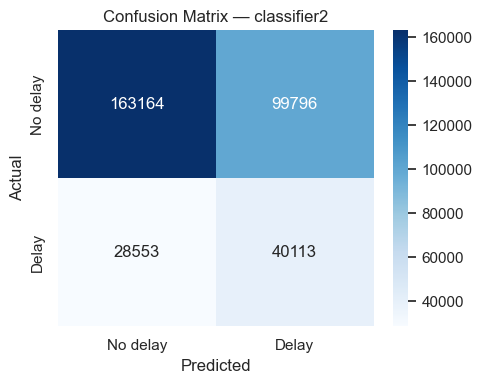

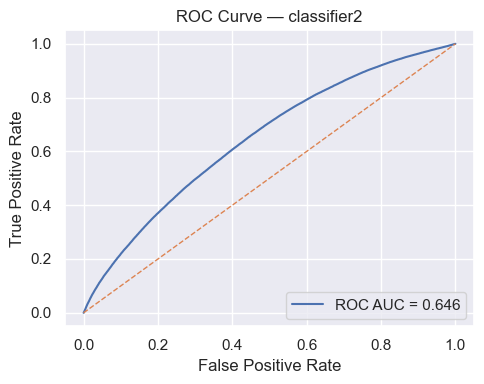

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classifier2 = LogisticRegression(max_iter=1000, class_weight="balanced")
classifier2.fit(X_train, y_train)

y_pred2  = classifier2.predict(X_test)
y_proba2 = classifier2.predict_proba(X_test)[:, 1]

# Metrics
cm  = confusion_matrix(y_test, y_pred2)
tn, fp, fn, tp = cm.ravel()
accuracy   = accuracy_score(y_test, y_pred2)
precision  = precision_score(y_test, y_pred2, zero_division=0)
recall     = recall_score(y_test, y_pred2)
specificity = tn / (tn + fp) if (tn + fp) else np.nan
f1         = f1_score(y_test, y_pred2)
roc_auc    = roc_auc_score(y_test, y_proba2)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"Specific.: {specificity:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {roc_auc:.3f}")

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No delay','Delay'], yticklabels=['No delay','Delay'])
plt.title("Confusion Matrix — classifier2")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba2)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — classifier2")
plt.legend(loc="lower right")
plt.tight_layout(); plt.show()


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Enter your code here

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here